# **Distracted Driver Detection**

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        pass

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Importing the Dataset

In [ ]:
# Get the list of all files and directories in the root directory
#os.listdir("/")

# Get the path of current working directory
#path = os.getcwd()  == print(os.listdir())

import os
path = '/kaggle/input/state-farm-distracted-driver-detection/'
print(os.listdir("../input")) 
print(os.listdir(path)) 

['state-farm-distracted-driver-detection']
['sample_submission.csv', 'driver_imgs_list.csv', 'imgs']


In [ ]:
import pandas as pd

img_list_path = '/kaggle/input/state-farm-distracted-driver-detection/driver_imgs_list.csv'
df_img = pd.read_csv(img_list_path)
df_img.shape

(22424, 3)

In [ ]:
df_img.head()

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


# Examining the Data

In [ ]:
df_img['classname'].value_counts(sort = False).index

Index(['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9'], dtype='object')

In [ ]:
# Find the frequency of images per driver
drivers_id = pd.DataFrame((df_img['subject'].value_counts()).reset_index())
drivers_id.columns = ['driver_id', 'Counts']
drivers_id

,driver_id,Counts
0,p021,1237
1,p022,1233
2,p024,1226
3,p026,1196
4,p016,1078
5,p066,1034
6,p049,1011
7,p051,920
8,p014,876
9,p015,875


In [ ]:
# Making a list of classes consisting of our output
classes = ['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9'] 

train_path = '/kaggle/input/state-farm-distracted-driver-detection/imgs/train'
test_path = '/kaggle/input/state-farm-distracted-driver-detection/imgs/test'
print(train_path)
print(test_path)

/kaggle/input/state-farm-distracted-driver-detection/imgs/train
/kaggle/input/state-farm-distracted-driver-detection/imgs/test


There are 10 total training categories.
['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
--------------------------------------------------
Number of instances of class c0 in Train : 2489
Number of instances of class c1 in Train : 2267
Number of instances of class c2 in Train : 2317
Number of instances of class c3 in Train : 2346
Number of instances of class c4 in Train : 2326
Number of instances of class c5 in Train : 2312
Number of instances of class c6 in Train : 2325
Number of instances of class c7 in Train : 2002
Number of instances of class c8 in Train : 1911
Number of instances of class c9 in Train : 2129
--------------------------------------------------

Total number of images in Test:  79726
--------------------------------------------------
There are 22424 train images.
--------------------------------------------------


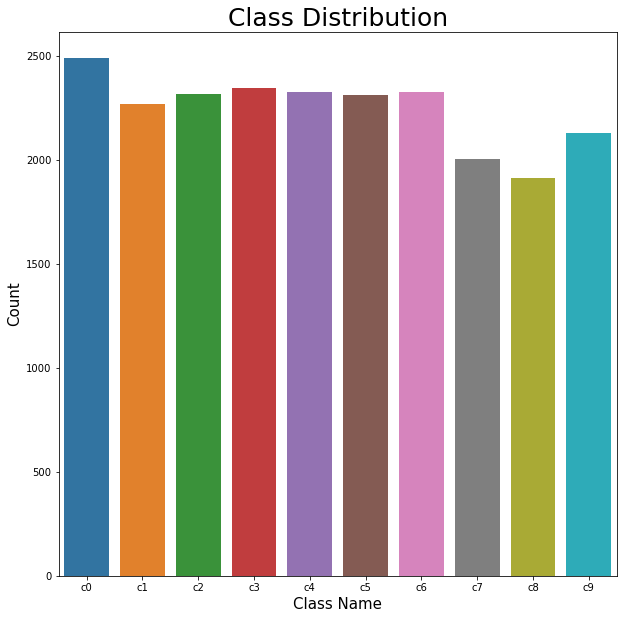

In [ ]:
print('There are 10 total training categories.')
print(df_img['classname'].value_counts(sort = False).index.tolist())
print("-"*50)


#accessing the training data and counting photo of each class
for category in classes:
    count = 0
    path = os.path.join(train_path, category)
    #print(path)
    for img in os.listdir(path):
        count += 1 #from directory counting
    print("Number of instances of class {} in Train : {}".format(category, count))
print("-"*50)
#counting total no of images in test data
count = 0
for img in os.listdir(test_path):
    count += 1
print('\nTotal number of images in Test: ', count)
print("-"*50)


image_count = df_img['classname'].value_counts(sort = False).values #from training_csv
print(f'There are {image_count.sum()} train images.')
print("-"*50)

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,10))
# Count the number of images per category
sns.countplot(x = 'classname', data = df_img)
plt.title('Class Distribution',size=25)
plt.xlabel('Class Name',size=15)
plt.ylabel('Count',size=15)
plt.show()

Class  c0 :  hands on the wheel


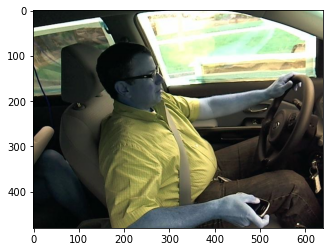




Class  c1 :  mobile in right hand


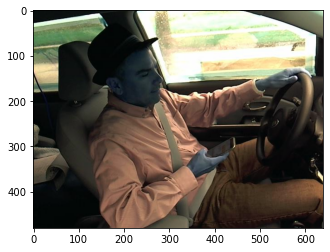




Class  c2 :  talking on the phone with right hand


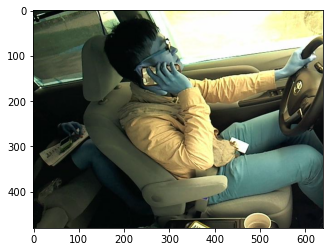




Class  c3 :  mobile in left hand


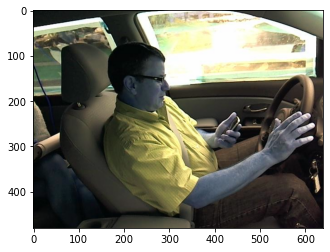




Class  c4 :  talking on the phone with left hand


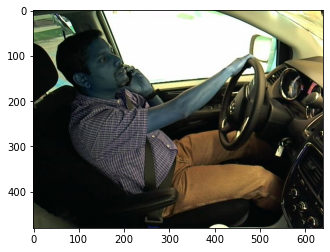




Class  c5 :  touching at the dash


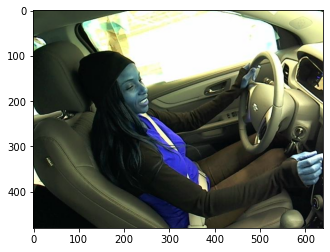




Class  c6 :  drinking


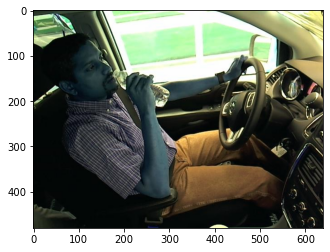




Class  c7 :  reaching behind


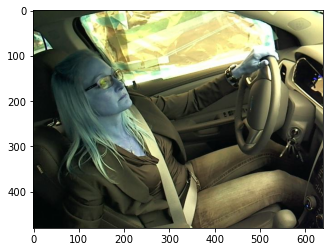




Class  c8 :  touching the head


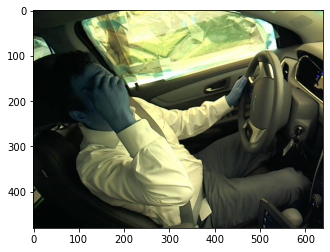




Class  c9 :  looking to the side


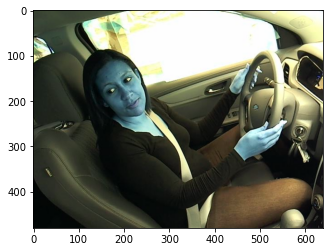

In [ ]:
# explanation for each of the classes
class_dict = {
    'c0': 'hands on the wheel',
    'c1': 'mobile in right hand',
    'c2': 'talking on the phone with right hand',
    'c3': "mobile in left hand",
    'c4': 'talking on the phone with left hand',
    'c5': 'touching at the dash',
    'c6': 'drinking',
    'c7': 'reaching behind',
    'c8': 'touching the head',
    'c9': 'looking to the side'
}

import cv2 
#plotting the single image of each class as preview
for cls in classes:
    path = os.path.join(train_path, cls)
    print("Class ", cls, ': ', class_dict[cls])
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
        plt.imshow(img_array, cmap = 'gray')
        plt.show()
        print('\n')
        print()
        break

In [ ]:
print(img_array.shape)
classes.index('c0')

(480, 640, 3)


0

# Data Preparation

In [ ]:

def create_training_data(num_train, img_width, img_height):
    training_data = []
    for category in classes:
        img_count = 0
        path = os.path.join(train_path,category)
        class_num = classes.index(category)
        for img in os.listdir(path):
            #Taking first thousand images of each class 
            if img_count < num_train :
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                #resize image
                new_img = cv2.resize(img_array, (img_width,img_height) )
                # get image and class type
                training_data.append([new_img, class_num])
                img_count += 1
    return training_data

def create_testing_data(num_test, img_width, img_height):
    testing_data = []
    img_count =0
    for img in os.listdir(test_path):
        #Taking 1000 images for testing
        if img_count < num_test:  
            img_array = cv2.imread(os.path.join(test_path,img), cv2.IMREAD_GRAYSCALE)
            new_img = cv2.resize(img_array,(img_width,img_height))
            testing_data.append([img, new_img])
            img_count += 1
    return testing_data


In [ ]:
#Number of training data and testing data we want to train and test on
num_train = 1000
num_test = 1000

#Image dimensions
img_width = 256 
img_height = 256

training_data = create_training_data(num_train, img_width, img_height) 
testing_data = create_testing_data(num_test, img_width, img_height) 

#shuffling data
import random 
random.shuffle(training_data)

len(training_data), len(testing_data)

(10000, 1000)

In [ ]:
X, y = list(), list()
for features, label in training_data:
    X.append(features) # Appending the image data into x
    y.append(label)    # Appending the class of the given image into y
len(X), len(y)

(10000, 10000)

In [ ]:
print(y[0:10])
from keras.utils import np_utils
#Converting Y into one hot encoded form
Y = np_utils.to_categorical(y, num_classes=10) 
Y[0:10] 

[9, 3, 0, 6, 7, 1, 0, 7, 2, 8]


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
import numpy as np
#Reshaping the image to fit the batch size (batch count,w,h,c)
X = np.array(X).reshape(-1,img_width,img_height,1)
X[0].shape

(256, 256, 1)

In [ ]:
from sklearn.model_selection import train_test_split 
#Dividing the training data into train and test
X_train,X_test,y_train,y_test = train_test_split(X, Y,test_size=0.2,random_state=123) 

print("Shape of train images is:", X_train.shape)
print("Shape of validation images is:", X_test.shape)
print("Shape of training labels is:", y_train.shape)
print("Shape of testing labels is:", y_test.shape)

Shape of train images is: (8000, 256, 256, 1)
Shape of validation images is: (2000, 256, 256, 1)
Shape of training labels is: (8000, 10)
Shape of testing labels is: (2000, 10)


# **Creating CNN Model Architecture**

In [ ]:
#Importing required lib for building CNN model
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from keras.layers import BatchNormalization, ZeroPadding2D, Activation
batch_size = 64 #Batch size for gradient descent
nb_epochs = 20 #Number of epochs

In [ ]:
os.environ['KERAS_BACKEND'] = 'tensorflow'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # 3 = INFO, WARNING, and ERROR messages are not printed

In [ ]:
# creating 2 CNN and 2 dense layer model
model1 = Sequential()

model1.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu',input_shape=(256,256,1)))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2),strides=2, padding='valid'))

model1.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model1.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='same'))

model1.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='same'))

model1.add(Flatten())

model1.add(Dense(256, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.1))
model1.add(Dense(128, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.1))
model1.add(Dense(10, activation='softmax'))


In [ ]:
#Outputting the summary of the model
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 64)      640       
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 128)     512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 256)       2

In [ ]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping, Callback, ModelCheckpoint
checkpointer = ModelCheckpoint('weights.h5', monitor='val_loss', mode='min',
                               verbose=1, save_best_only=True)
es = EarlyStopping(monitor='val_acc', mode='min', verbose=1, patience=2)
callbacks = [checkpointer, es]

In [ ]:
history = model1.fit(X_train,y_train,batch_size=batch_size,epochs = 10, verbose=1, validation_data=(X_test,y_test), callbacks = callbacks)

Epoch 1/10
125/125 [==============================] - 31s 207ms/step - loss: 0.7293 - accuracy: 0.7864 - val_loss: 0.4721 - val_accuracy: 0.8520

Epoch 00001: val_loss improved from inf to 0.47212, saving model to weights.h5
Epoch 2/10
125/125 [==============================] - 25s 199ms/step - loss: 0.0649 - accuracy: 0.9868 - val_loss: 0.2127 - val_accuracy: 0.9395

Epoch 00002: val_loss improved from 0.47212 to 0.21266, saving model to weights.h5
Epoch 3/10
125/125 [==============================] - 25s 199ms/step - loss: 0.0292 - accuracy: 0.9941 - val_loss: 1.1731 - val_accuracy: 0.6645

Epoch 00003: val_loss did not improve from 0.21266
Epoch 4/10
125/125 [==============================] - 25s 200ms/step - loss: 0.0360 - accuracy: 0.9925 - val_loss: 0.0675 - val_accuracy: 0.9820

Epoch 00004: val_loss improved from 0.21266 to 0.06746, saving model to weights.h5
Epoch 5/10
125/125 [==============================] - 25s 199ms/step - loss: 0.0086 - accuracy: 0.9987 - val_loss: 0.029

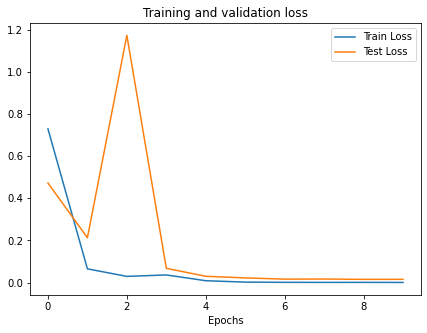

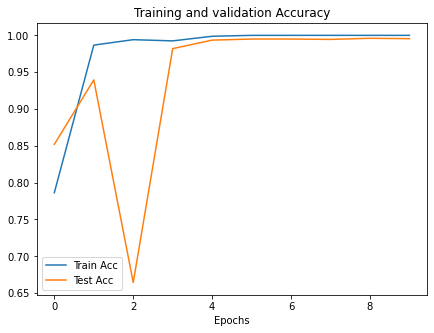

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

#Plotting training data loss value with validation data loss value after each epoch
plt.figure(figsize=(7, 5))
plt.plot(loss)
plt.plot(val_loss)
plt.xlabel('Epochs')
plt.title('Training and validation loss')
plt.legend(['Train Loss','Test Loss'], loc='best')
plt.savefig('losses.png')

#Plotting training data accuracy with validation data accuracy after each epoch 
plt.figure(figsize=(7, 5))
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.xlabel('Epochs')
plt.title('Training and validation Accuracy')
plt.legend(['Train Acc','Test Acc'], loc='best')
plt.savefig('accuracy.png')

# Predict And Evaluate Model

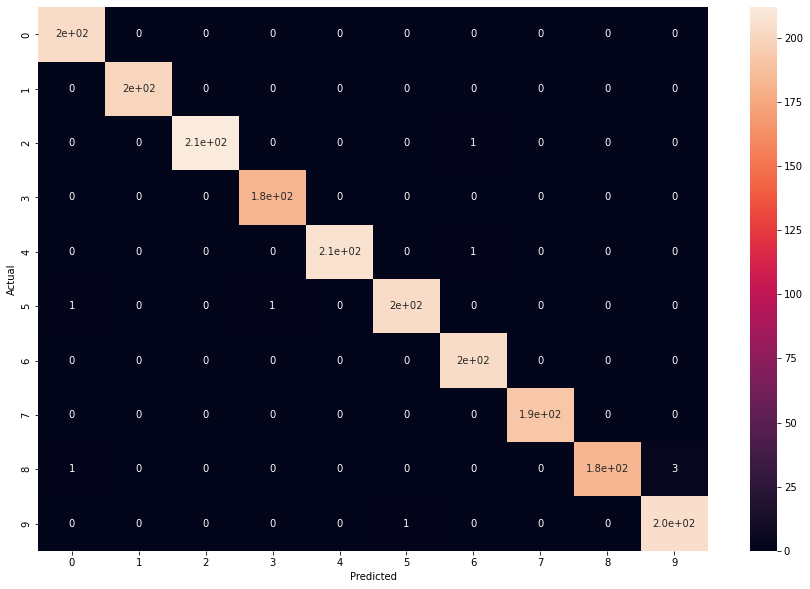

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix

#Predicting on test data
y_val_pred = []
y_val_actual = []
for n in range(len(X_test)):
    preds = model1.predict(np.array([X_test[n]]))
    y_val_pred.append(np.argmax(preds[0]))
    y_val_actual.append(np.nonzero(y_test[n])[0][0])


# Confusion Matrix
data = {'y_Actual':    y_val_actual,    'y_Predicted': y_val_pred}
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [ ]:
#Printing classification report
from sklearn.metrics import classification_report
print(classification_report(y_val_actual, y_val_pred, target_names=class_dict.keys()))

              precision    recall  f1-score   support

          c0       0.99      1.00      1.00       203
          c1       1.00      1.00      1.00       200
          c2       1.00      1.00      1.00       213
          c3       0.99      1.00      1.00       183
          c4       1.00      1.00      1.00       208
          c5       1.00      0.99      0.99       205
          c6       0.99      1.00      1.00       203
          c7       1.00      1.00      1.00       192
          c8       1.00      0.98      0.99       187
          c9       0.99      1.00      0.99       206

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [ ]:
# Printing accuracy on validation data
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score #Importing lib for calculating accuracy and all
accuracy = accuracy_score(y_val_actual,y_val_pred)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_val_actual,y_val_pred,average='weighted')
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_val_actual,y_val_pred,average='weighted')
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_val_actual,y_val_pred,average='weighted')
print('F1 score: %f' % f1)

Accuracy: 0.995500
Precision: 0.995534
Recall: 0.995500
F1 score: 0.995497


In [ ]:
X_test[0].shape

(256, 256, 1)

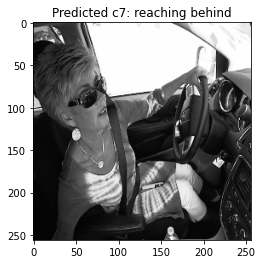

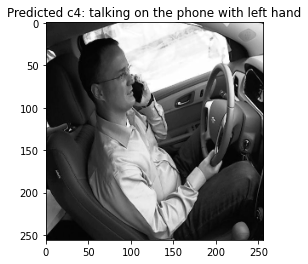

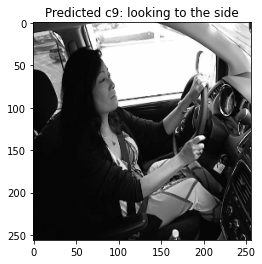

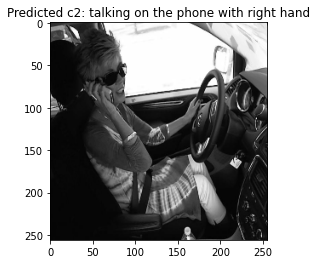

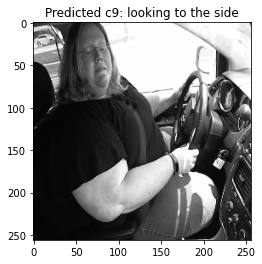

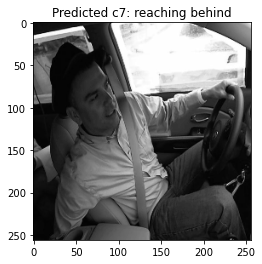

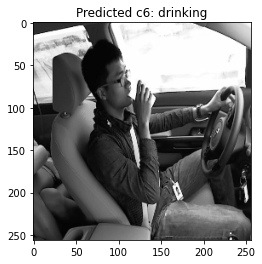

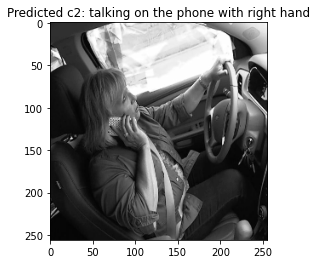

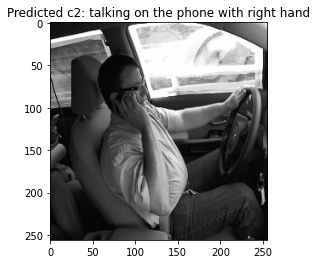

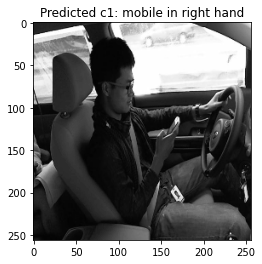

In [ ]:
# Sample Predictions on test data
for n in range(110,120):
    img_array = X_test[n]
    plt.imshow(img_array, cmap='gray')
    title_val = y_val_pred[n]
    plt.title('Predicted c{}: {}'.format(title_val, class_dict['c{}'.format(title_val)]))
    plt.show()
    print('\n')

# Predicting On Testing images

In [ ]:
#Predicting on testing images
y_pred = []
for n in range(num_test):
    img_arr = testing_data[n][1]
    test_img = np.array(img_arr).reshape(-1,img_width,img_height,1)
    preds = model1.predict(test_img)
    class_idx = np.argmax(preds[0])
    y_pred.append(class_idx)

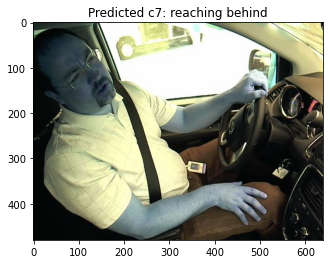

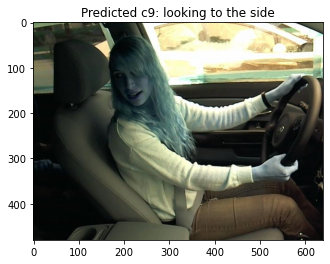

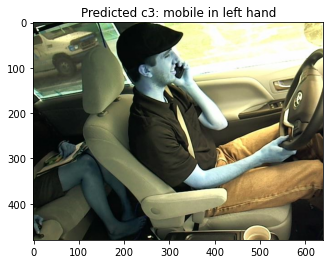

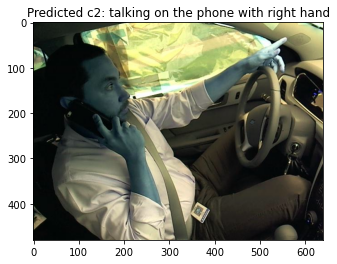

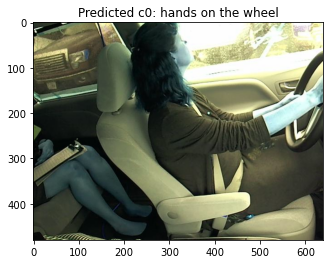

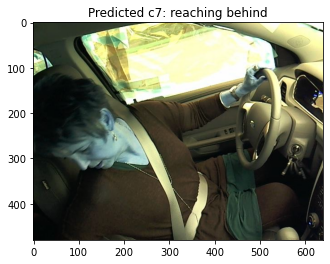

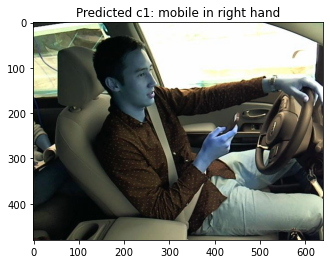

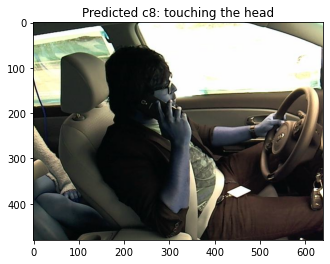

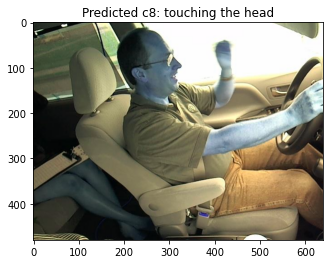

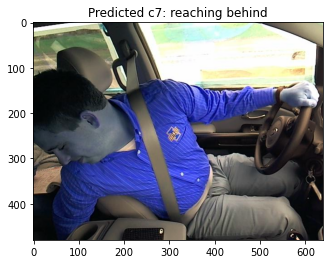

In [ ]:
# Sample Predictions
for n in range(110,120):
    img = testing_data[n][0]
    img_array = cv2.imread(os.path.join(test_path, img), cv2.IMREAD_COLOR)
    plt.imshow(img_array, cmap='gray')
    title_val = y_pred[n]
    plt.title('Predicted c{}: {}'.format(title_val, class_dict['c{}'.format(title_val)]))
    plt.show()
    print('\n')